# Natural Language Processing - Assignment 2
# Sentiment analysis for movie reviews

This notebook was created for you to answer question 2, 3, 4 and 5 from assignment 2. Please read the steps and the provided code carefully and make sure you understand them. You will be provided with a rough outline of functions, but you will need to fill most of them with your own code. 

The (red) comments at the beginning of each function explain what they should do, which parameters you should give as input and which variables should be returned by the function. After the blue comments "### student code here###' you should write your own code.

### Step 0 - Libraries
Make sure you have the needed libraries installed on your computer: Pandas, Numpy, NLTK...

### Step 1 - Load Data

In the first step, we are going to load the data in a Pandas DataFrame. Pandas DataFrames are a useful way of storing data. DataFrames are tables in which data can be accessed as columns, as rows or as individual cells. You can find more info on DataFrames here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

Read the code below and make sure you understand what is happening. Run the code to load your data.

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import glob

In [ ]:
def get_path(filename):
    """
    Makes a list of all the paths that fit the search requirement
    
    :param filename: A regular expression that defines the search requirement for the filenames
    :return  Returns a list of all the pathnames
    """
    # place the movies folder in the same directory as this notebook
    current_directory = os.getcwd()

    # glob.glob() is a pattern-matching path finder, it searches for the reviews in the movies folder based on a Regular Expression
    paths = glob.glob(current_directory + '/movies/' + filename)
    
    if len(paths) == 0:
        print('Your file list is empty. The code looks for the folder '+current_directory+'/movies, but could not find it.')
    else: 
        print("You loaded: ", len(paths), "files")
    return paths

In [ ]:
def load_data(pathset):
    """
    Loads the data into a dataframe
    
    :param pathset:  A list of paths
    :return  A dataframe with three columns: Path, Review (Text) and Label
    """
    # Files are named by sentiment (P for positive, N for negative)
    pattern = re.compile('P-train[0-9]*.txt')
    reviews = []
    labels = []
    df = pd.DataFrame(columns = ['Path', 'Review', 'Label'])
    for path in pathset:
        if re.search(pattern, path):
            text = open(path, "r").read()
            reviews.append(text)
            labels.append('Pos')
        else:
            text = open(path, "r").read()
            reviews.append(text)
            labels.append('Neg')
    df['Path'] = pathset
    df['Review'] = reviews
    df['Label'] = labels
    return df

In [ ]:
paths = get_path('train/[NP]-train[0-9]*.txt')
data = load_data(paths)
data.head()

### Step 2 - Tokenization

In this step, you should write a tokenizer and compare it with an off-the-shelf one.

#### 2.1 Making your own tokenizer

In [ ]:
def my_tokenizer(text):
    """
    The implementation of your own tokenizer
    
    :param text:  A string with a sentence (or paragraph, or document...)
    :return  A list of tokens
    """    
    ### student code here ###
    #v1
    text = text.replace('.','')
    text = text.replace(',','')
    tokenized_text = str.split(text,' ')
    
    # v2
    # regular=re.compile("[a-zA-z']+|[0-9]+\.[0-9]+?|[^a-z0-9A-Z\s]+")
    # tokenized_text=regular.findall(text)
    return tokenized_text

sample_string1 = "If you have the chance, watch it. Although, a warning, you'll cry your eyes out."
sample_string2 = "Whatever is worth doing is worth doing well." #Write two more sample sentences to tokenize 
sample_string3 = "The hard part isn’t making the decision. It’s living with it."
print(my_tokenizer(sample_string1))
print(my_tokenizer(sample_string2))
print(my_tokenizer(sample_string3))

#### 2.2 Using an off-the-shelf tokenizer

In [ ]:
#Now we are gonna compare the tokenizer you just wrote with the one from NLTK
#if you installed NLTK but never downloaded the 'punkt' tokenizer, uncomment the following lines:
# import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

def nltk_tokenizer(text):
    """
    This function should apply the word_tokenize (punkt) tokenizer of nltk to the input text
    
    :param text:  A string with a sentence (or paragraph, or document...)
    :return  A list of tokens
    """     
    ### student code here ###    
    tokenized_text = word_tokenize(text)
    
    
    
    return tokenized_text

test_sentences = ["I like this assignment because:\n-\tit is fun;\n-\tit helps me practice my Python skills.",
        "I won a prize, but I won't be able to attend the ceremony.",
        "“The strange case of Dr. Jekyll and Mr. Hyde” is a famous book... but I haven't read it.",
        "I work for the C.I.A., and you?",
        "OMG #Twitter is sooooo coooool <3 :-) <-- lol...why do i write like this idk right? :) 🤷😂 🤖"]

for test_string in test_sentences:
    print(my_tokenizer(test_string))
    print(nltk_tokenizer(test_string))
    print("\n")
    

#### 2.3 Vocabulary
Now you need to tokenize the reviews data. Use the nltk_tokenizer() for splitting words. Apply heavy normalisation by removing punctuation (e.g. using string.punctuation) and transforming each sentence to lowercase. Also add a start ('&lt;S>') and end token ('&lt;E>') to each list of tokens. 
Your tokenized review should look something like this: \['&lt;S>', 'i', 'really', 'liked', 'the', 'movie', '&lt;E>'\]. Add a new column to the DataFrame containing the tokens of each review. 

In [8]:
from nltk.tokenize import RegexpTokenizer
def tokenize_reviews(reviews):
    """
    This function should apply the nltk_tokenizer to each review in input
    
    :param text:  A list of reviews (strings)
    :return  A list of tokenized reviews
    """     
    tokenized_reviews = []
    ### student code here ###      
    for index in range(len(reviews)):
        text = reviews[index]
        text = text.lower()
        tokenizer = RegexpTokenizer(r'\w+')
        tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')
        words = tokenizer.tokenize(text)
        words.insert(0,'<S>');
        words.append('<E>')
        tokenized_reviews.append(words)
    
    return tokenized_reviews



In [9]:
data['Toks'] = tokenize_reviews(data['Review'])
data.head()
# print(data['Toks'][0])

,Path,Review,Label,Toks
0,f:\master\courses\1a\natural language processi...,Once again Mr. Costner has dragged out a movie...,Neg,"[<S>, once, again, mr, costner, has, dragged, ..."
1,f:\master\courses\1a\natural language processi...,This is a pale imitation of 'Officer and a Gen...,Neg,"[<S>, this, is, a, pale, imitation, of, office..."
2,f:\master\courses\1a\natural language processi...,"Years ago, when DARLING LILI played on TV, it ...",Neg,"[<S>, years, ago, when, darling, lili, played,..."
3,f:\master\courses\1a\natural language processi...,I was looking forward to this movie. Trustwort...,Neg,"[<S>, i, was, looking, forward, to, this, movi..."
4,f:\master\courses\1a\natural language processi...,I gave this a 3 out of a possible 10 stars.\n\...,Neg,"[<S>, i, gave, this, a, 3, out, of, a, possibl..."


Next, count the words/n-grams to get their frequencies. Then, answer the questions in the assignment PDF

Now build the vocabulary. Since many words occur only a few times, keep only the words that occur at least 25 times in your vocabulary. Remember: the vocabulary contains only the types and not the tokens.



In [15]:
from nltk import ngrams
from itertools import chain

In [16]:
# example on how to create n-grams based on the ngrams() function
text = "Hello there how do you like this function"
bigrams = list(ngrams(word_tokenize(text), 2))
bigrams

NameError: name 'word_tokenize' is not defined

In [ ]:
# Make a single list of all your tokens for each n-gram 
# Subsequently give this list as input to the get_frequencies(ngrams) function

# We created the list for the unigrams for you using chains
# Find more info on chains here: https://docs.python.org/3/library/itertools.html#itertools.chain
unigrams = list(chain.from_iterable(data['Toks']))


# Now create the lists for bigrams and trigrams yourself
### Student code here ###
bigrams = list(ngrams(unigrams, 2))
trigrams = list(ngrams(unigrams, 3))
#still need 1-gram

# print(bigrams)
# print(trigrams)




In [29]:
def get_frequencies(ngrams):
    
    """
    Counts the times a word occurs
    
    :param ngrams:  A list of ngrams
    :return  A dictionary with the ngram as key and its count as value
    """
    
    ### Student code here ###

    ngram_frequencies = {}
    for index in range(len(ngrams)):
        if ngrams[index] in ngram_frequencies:
            ngram_frequencies[ngrams[index]] = ngram_frequencies[ngrams[index]] + 1
        else:
            ngram_frequencies[ngrams[index]] = 1
            


    return ngram_frequencies

unigrams: 148127 bigrams: 148126 trigrams 148125
the 8437
and 4144
a 4091
of 3673
to 3324
is 2731
in 2386
it 2178
i 2028
this 1738
[6140, 1994, 979, 648]


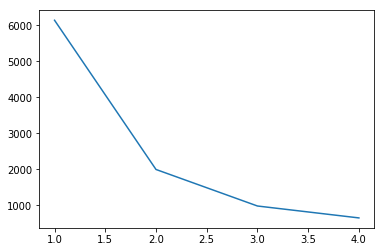

In [84]:
unigram_frequencies = get_frequencies(unigrams)
bigram_frequencies = get_frequencies(bigrams)
trigram_frequencies = get_frequencies(trigrams)

### Answers the questions of step 2.2 here ###
# Tip: look into using lambda to sort a dictionary

print("unigrams:",len(unigrams),"bigrams:",len(bigrams),"trigrams",len(trigrams));
unigram_frequencies = sorted(unigram_frequencies.items(),key = lambda x:x[1],reverse = True)

count=0
for index in unigram_frequencies:
    count+=1
    if count>10:
        break
    print(index[0],index[1])
def frequency_statistic(unigram_frequencies):
    import matplotlib.pyplot as plt
    times=[0 for i in range(4)]
    for index in unigram_frequencies:
        n=index[1]
        if n<5:
            times[n-1]+=1
    x=[i+1 for i in range(4)]
    plt.plot(x,times)
    print(times)
    plt.show()
frequency_statistic(unigram_frequencies)       

    


In [ ]:
def get_vocabulary(unigram_frequ):
    
    """
    Creates a vocabulary by filtering out the words with a count less than 25
    
    :param unigram_frequ: Dictionary with tokens as key and count as value
    :return  The param dictionary without the words with a count less than 25
    """
    
    ### Student code here ###
    
    vocabulary = {}
    
    for index in unigram_frequ:
        if unigram_frequ[index] >= 25:
            vocabulary[index] = unigram_frequ[index]
        else:
            continue
        
    return vocabulary

In [36]:
vocabulary = get_vocabulary(unigram_frequencies)
vocabulary

TypeError: list indices must be integers or slices, not tuple

### Step 3 - Text classification with a unigram language model

In our dataset we have two classes: positive (Pos) and negative (Neg). For
each class, we will calculate a separate language model. This is the training
or learning phase. In the apply phase, we will classify new texts as positive or
negative. For testing our machine learning classifier, we apply the models on
the documents in the test part of the corpus.

#### 1. Training phase
* Build 2 language models for the training directory, one positive, one negative.
* How big is the positive/negative vocabulary?

In [41]:
# Now, let's separate the training corpus to positive and negative, and build two vocabularies: a positive and a negative one

### Student answer here ###
#Path Review Label
ndoc =len(data)
neg = 0
pos = 0
for index in range(len(data)):
    if data['Label'][index] == 'Neg':
        neg = neg + 1
    else:
        pos = pos + 1
logprior = []
logprior.append(np.log(pos/ndoc))
logprior.append(np.log(neg/ndoc))

bigdoc_pos = {}
bigdoc_neg = {}
for index in range(len(data)):
    tokens = data['Toks'][index]
    lab = data['Label'][index]
    
    if lab == 'Pos':
        for i in range(len(tokens)):
            if tokens[i] in bigdoc_pos:
                bigdoc_pos[tokens[i]] = bigdoc_pos[tokens[i]] + 1
            else:
                bigdoc_pos[tokens[i]] = 1
    else:
        for i in range(len(tokens)):
            if tokens[i] in bigdoc_neg:
                bigdoc_neg[tokens[i]] = bigdoc_neg[tokens[i]] + 1
            else:
                bigdoc_neg[tokens[i]] = 1
# print(bigdoc_pos,bigdoc_neg)       
count_w_pos = 0
count_w_neg = 0
for index in vocabulary:
    if index in bigdoc_pos:
        count_w_pos = count_w_pos + bigdoc_pos[index]
    if index in bigdoc_neg:
        count_w_neg = count_w_neg + bigdoc_neg[index]
# print(count_w_pos,count_w_neg)





#### 2. Testing phase
Now that we know the unigram counts for each class, as well as the size of our labelled vocabulary, we can classify our test data. 

1. Load your test data and write it into a DataFrame. Then tokenize the words and add them as a new column.
2. Classify your test data. To find the correct class for each point in the data set, implement the unigram formula for classification (see homework 2 assignment, question 3).
3. Write your resulting classification to a new file of the same format as the groundtruth file. 


In [ ]:
# First, read all the test data and tokenize it.
# You may use the functions defined at the beginning of the notebook. 

### Student code here ###
paths = get_path('test/[NP]-test[0-9]*.txt')
test_data = load_data(paths)
test_data.head()

test_data['Toks'] = tokenize_reviews(test_data['Review'])
test_data.head()


In [48]:
# Second, classify each test file according to the formula 
# Hint: Don't forget to use the log probabilities, and how the calculation of P(w|c) changes when moving to log space!
# Use Laplace smoothing and define k

def classify_unigram(tokens):
    '''
    Classification function based on unigrams for one test file 
    
    :param tokens: List of tokens from one test file
    :returns classification label: 'P' for positive label and 'N' for negative label
    '''
    ### Student code here ###
    p_pos = logprior[0]
    p_neg = logprior[1]
    for index in range(len(tokens)):
        word = tokens[index]
        if word in vocabulary:
            if word in bigdoc_pos:
                p_pos = p_pos + np.log((bigdoc_pos[word]+1)/(count_w_pos+len(vocabulary)))
            if word in bigdoc_neg:
                p_neg = p_neg + np.log((bigdoc_neg[word]+1)/(count_w_neg+len(vocabulary)))
    
    
    
    
    # return classification, write your own if-statement
#     if # Probability of positive sentiment > probability of negative sentiment:
    if p_pos > p_neg :
        return 'P'
    else:
        return 'N'

In [ ]:
# Classify test set
test_data['Preds_unigram'] = test_data['Toks'].apply(classify_unigram)

In [53]:
# Write results file
filenames = test_data['Path'].apply(lambda x: (x.split('\\')[-1])[:-4]) #get a list of the filenames
results = open('results_unigram.txt', 'w')
for (filename, pred) in zip(filenames, test_data['Preds_unigram']):
    filename = filename.replace('/Users/zhangxuhao/Documents/特文特/1A/Natural Language Processing/hw2/movies/test/','')
    results.write(filename + ' ' + pred + '\n')
results.close()

### Step 4 - Text classification with a bigram language model

Now we will classify the same dataset again, but this time with bigram language models. The steps are similar, but think about how the language models will change.

#### 1. Training phase
* Build 2 language models for the training directory, one positive, one negative.


In [56]:
# Start by separating the training corpus to positive and negative, and building the labelled vocabulary

### Student code here ###

vocabulary = get_vocabulary(bigram_frequencies)
vocabulary


ndoc =len(data)
neg = 0
pos = 0
for index in range(len(data)):
    if data['Label'][index] == 'Neg':
        neg = neg + 1
    else:
        pos = pos + 1
logprior = []
logprior.append(np.log(pos/ndoc))
logprior.append(np.log(neg/ndoc))

bigdoc_pos = {}
bigdoc_neg = {}
for index in range(len(data)):
    tokens = data['Toks'][index]
    
    tokens = list(ngrams(tokens, 2))
    lab = data['Label'][index]
#     print(tokens)
    
    if lab == 'Pos':
        for i in range(len(tokens)):
            if tokens[i] in bigdoc_pos:
                bigdoc_pos[tokens[i]] = bigdoc_pos[tokens[i]] + 1
            else:
                bigdoc_pos[tokens[i]] = 1
    else:
        for i in range(len(tokens)):
            if tokens[i] in bigdoc_neg:
                bigdoc_neg[tokens[i]] = bigdoc_neg[tokens[i]] + 1
            else:
                bigdoc_neg[tokens[i]] = 1
                
# print(bigdoc_pos,bigdoc_neg)       
count_w_pos = 0
count_w_neg = 0
for index in vocabulary:
    if index in bigdoc_pos:
        count_w_pos = count_w_pos + bigdoc_pos[index]
    if index in bigdoc_neg:
        count_w_neg = count_w_neg + bigdoc_neg[index]



#### 2. Testing phase
Now that we know the bigram counts for each label, as well as the size of our labelled vocabulary, we can label our test data similarly to before. 

To find the correct label, implement the bigram formula for classification and write your resulting classification to a new file. We can use the test_data already created in the previous exercise.


In [59]:
# First, we need to process our test data to represent bigrams

from nltk.tokenize import RegexpTokenizer
def tokenize_reviews_bigram(reviews):
    """
    This function should apply the nltk_tokenizer to each review in input
    
    :param text:  A list of reviews (strings)
    :return  A list of tokenized reviews
    """     
    tokenized_reviews = []
    ### student code here ###      
    for index in range(len(reviews)):
        text = reviews[index]
        text = text.lower()
        tokenizer = RegexpTokenizer(r'\w+')
        tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')
        words = tokenizer.tokenize(text)
        words.insert(0,'<S>');
        words.append('<E>')
        tokenized_reviews.append(words)
    
    return tokenized_reviews




paths = get_path('test/[NP]-test[0-9]*.txt')
test_data = load_data(paths)


test_data['Bigrams'] = tokenize_reviews_bigram(test_data['Review'])


for index in range(len(test_data)):
    token = test_data['Bigrams'][index]
    test_data['Bigrams'][index] = list(ngrams(token, 2))

test_data.head()




You loaded:  50 files


,Path,Review,Label,Bigrams
0,f:\master\courses\1a\natural language processi...,Story of a man who has unnatural feelings for ...,Neg,"[(<S>, story), (story, of), (of, a), (a, man),..."
1,f:\master\courses\1a\natural language processi...,Robert DeNiro plays the most unbelievably inte...,Neg,"[(<S>, robert), (robert, deniro), (deniro, pla..."
2,f:\master\courses\1a\natural language processi...,"This film had a lot of promise, and the plot w...",Neg,"[(<S>, this), (this, film), (film, had), (had,..."
3,f:\master\courses\1a\natural language processi...,If you look at Corey Large's information here ...,Neg,"[(<S>, if), (if, you), (you, look), (look, at)..."
4,f:\master\courses\1a\natural language processi...,All I could think of while watching this movie...,Neg,"[(<S>, all), (all, i), (i, could), (could, thi..."


In [62]:
# Second, classify each test file according to the formula 
# Hint: Don't forget to use the log probabilities, and how the calculation of P(w|c) changes when moving to log space!
# And when using Laplace smoothing, also k can be defined

c_pos = {}
c_neg = {}

for index in range(len(data)):
    tokens = data['Toks'][index]
    lab = data['Label'][index]
    
    if lab == 'Pos':
        for i in range(len(tokens)):
            if tokens[i] in c_pos:
                c_pos[tokens[i]] = c_pos[tokens[i]] + 1
            else:
                c_pos[tokens[i]] = 1
    else:
        for i in range(len(tokens)):
            if tokens[i] in c_neg:
                c_neg[tokens[i]] = c_neg[tokens[i]] + 1
            else:
                c_neg[tokens[i]] = 1
                


def classify_bigram(tokens):
    '''
    Classification function based on bigrams for one test file 
    
    :param tokens: List of bigram tokens from one test file
    :returns classification label: 'P' for positive label and 'N' for negative label
    '''
    ### Student code here ###
    
    p_pos = logprior[0]
    p_neg = logprior[1]
    for index in range(1,len(tokens),1) :
        word = tokens[index]
        if word in vocabulary:
            if word in bigdoc_pos:
                
                p_pos = p_pos + np.log((bigdoc_pos[word]+1)/(c_pos[word[0]]+len(vocabulary)))
            if word in bigdoc_neg:
                p_neg = p_neg + np.log((bigdoc_neg[word]+1)/(c_neg[word[0]]+len(vocabulary)))
                
                
                
    
    
    # return classification, write your own if-statement
#     if # Probability of positive sentiment > probability of negative sentiment:
    if p_pos > p_neg:
        return 'P'
    else:
        return 'N'

In [65]:
# Classify test set
test_data['Preds_bigram'] = test_data['Bigrams'].apply(classify_bigram)

In [ ]:
# Write results file
filenames = test_data['Path'].apply(lambda x: (x.split('\\')[-1])[:-4]) #get a list of the filenames
results = open('results_bigram.txt', 'w')
for (filename, pred) in zip(filenames, test_data['Preds_bigram']):
    filename = filename.replace('/Users/zhangxuhao/Documents/特文特/1A/Natural Language Processing/hw2/movies/test/','')
    results.write(filename + ' ' + pred + '\n')
results.close()

In [70]:
test_data.head()

,Path,Review,Label,Bigrams,Preds_bigram
0,f:\master\courses\1a\natural language processi...,Story of a man who has unnatural feelings for ...,Neg,"[(<S>, story), (story, of), (of, a), (a, man),...",P
1,f:\master\courses\1a\natural language processi...,Robert DeNiro plays the most unbelievably inte...,Neg,"[(<S>, robert), (robert, deniro), (deniro, pla...",N
2,f:\master\courses\1a\natural language processi...,"This film had a lot of promise, and the plot w...",Neg,"[(<S>, this), (this, film), (film, had), (had,...",N
3,f:\master\courses\1a\natural language processi...,If you look at Corey Large's information here ...,Neg,"[(<S>, if), (if, you), (you, look), (look, at)...",N
4,f:\master\courses\1a\natural language processi...,All I could think of while watching this movie...,Neg,"[(<S>, all), (all, i), (i, could), (could, thi...",N


### Step 5 - Classifier performance
This last section computes the accuracy of your classifier(s). In your report, discuss the results and ways to improve the classifier. 

Additional bonus points can be awarded if you implement one suggestion (or more), test if it improves the performance, and discuss why (or why not).

In [72]:
import sys

In [74]:
def read_predictions(filename):
    """ 
    Read predictions into dictionary
    
    param filename: the name of the file you would like to read
    return a dictionary containing the filename and the label
    """
    d = {}
    with open(filename) as f:
        for line in f:
           (key, val) = line.split()
           d[key] = val
    return d

In [ ]:
def evaluate(result_file):
    '''
    Evaluates the performance of your model by calculating the accuracy
    
    param result_file: the name of the result file you would like to evaluate
    return the accuracy of the prediction
    '''

    # place the groundtruth file in the same directory as this notebook
    current_directory = os.getcwd()
    ground_truth_file = ''.join(glob.glob(current_directory + '/groundtruth.txt'))
    results_file = ''.join(glob.glob(current_directory + result_file))

    print( "Results file: ",  results_file )
    print( "Groundtruth file: ",  ground_truth_file )

    results_map = read_predictions(results_file)
    ground_truth_map = read_predictions(ground_truth_file)

    # Calculate accuracy and print incorrect predictions
    correct = 0
    for ID in ground_truth_map:
        label = ground_truth_map[ID]
        if ID not in results_map:
            print( "Missing predictions for " + ID)
        elif results_map[ID] == label:
            correct = correct + 1
        else:
            print( "Incorrect " + ID )
    
    accuracy = str(float(correct)/len(ground_truth_map))

    # Print summary
    print( str(correct) + " out of " + str(len(ground_truth_map)) + " were correct!")
    print( "accuracy " + accuracy)
    
    return accuracy

In [77]:
unigram_performance = evaluate('/results_unigram.txt')
bigram_performance = evaluate('/results_bigram.txt')

Results file:  f:\master\courses\1a\natural language processing\homework2/results_unigram.txt
Groundtruth file:  


FileNotFoundError: [Errno 2] No such file or directory: ''